<a href="https://colab.research.google.com/github/Slrosales/Colombianos-detenidos-en-el-exterior/blob/main/Colombianos_detenidos_en_el_exterior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Informe de análisis exploratorio y archivos necesarios para ejecutar el código**

[Informe de análisis exploratorio](https://github.com/Slrosales/Colombianos-detenidos-en-el-exterior/blob/main/Informe%20del%20an%C3%A1lisis%20exploratorio.pdf)

[Archivos necesarios para ejecutar el código](https://github.com/Slrosales/Colombianos-detenidos-en-el-exterior/tree/main/Archivos%20necesarios%20para%20ejecutar%20el%20c%C3%B3digo)

# **2. Importación e instalación de librerías**

In [ ]:
import pandas as pd #Permite leer los archivos .CSV

In [ ]:
import matplotlib.pyplot as plt #Permite enerar los gráficos estadisticos

In [ ]:
import seaborn as sns #Permite mejorar visualemnte los gráficos

In [ ]:
import plotly.express as px #Permite la visualización de datos amigablemente (monocromaticos)

In [ ]:
import plotly.graph_objects as go #Permite crear mapas coropléticos ()

In [ ]:
pip install geopandas; #Paquete de instalación de geopandas

In [ ]:
import geopandas as gpd #Permite el uso de datos de Pandas para las operaciones espaciales
                        #de tipos geométricos de SIG (puntos, líneas y polígonos)

In [ ]:
import math #Permite la realización de operaciones complejas como las logáritmos

In [ ]:
import folium #Permite crear mapas interactivos usando Leaflet

In [ ]:
import numpy as np

# **3. Importación del dataset “colombianos detenidos en el exterior”.**

In [ ]:
df = pd.read_csv('https://www.datos.gov.co/api/views/e97j-vuf7/rows.csv?accessType=DOWNLOAD');

df.head(5)

<ipython-input-11-80aaaa5aa771>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://www.datos.gov.co/api/views/e97j-vuf7/rows.csv?accessType=DOWNLOAD');


,FECHA PUBLICACIÓN,PAIS PRISIÓN,CONSULADO,DELITO,EXTRADITADO Y O REPATRIADO,SITUACIÓN JURÍDICA,GÉNERO,GRUPO EDAD,UBICACIÓN PAÍS,CANTIDAD,LATITUD,LONGITUD
0,2018-09-17,ECUADOR,C. QUITO,NARCOTRÁFICO,DESCONOCIDO,EN JUICIO,MASCULINO,DESCONOCIDO,"(-1.831239, -78.183406)",45,-1.831239,-78.183406
1,2018-09-17,ITALIA,C. ROMA,OTROS,DESCONOCIDO,EN INVESTIGACIÓN,MASCULINO,DESCONOCIDO,"(41.87194, 12.56738)",1,41.871940,12.567380
2,2018-09-17,ESTADOS UNIDOS,C. NUEVA YORK,EXTORSIÓN,DESCONOCIDO,CONDENADO,MASCULINO,ADULTO,"(37.09024, -95.712891)",1,37.090240,-95.712891
3,2018-09-17,MEXICO,C. MEXICO,OTROS,DESCONOCIDO,EN INVESTIGACIÓN,MASCULINO,ADULTO JOVEN,"(23.634501, -102.552784)",7,23.634501,-102.552784
4,2018-09-17,JAPON,C. TOKIO,ROBO / HURTO,DESCONOCIDO,CONDENADO,FEMENINO,ADULTO MAYOR,"(36.204824, 138.252924)",1,36.204824,138.252924


Las columnas del [dataframe](https://www.datos.gov.co/Estad-sticas-Nacionales/Colombianos-detenidos-en-el-exterior/e97j-vuf7) correponden a:


*   **FECHA PUBLICACIÓN:** Fecha en que se registran los datos de forma mensual para llevar el histórico de datos
*   **PAIS PRISIÓN:** País donde se ubica la prisión
*   **CONSULADO:** Consulado competente para asistir al detenido
*   **DELITO:** Delito del registro carcelario
*   **EXTRADITADO Y O REPATRIADO:**	Indica si el detenido ha estado en proceso de extradición o de repatriación
*   **SITUACIÓN JURÍDICA:** Situación jurídica actual del detenido
*   **GÉNERO:** Indica el género del detenido
*   **GRUPO EDAD:** Indica el grupo de edad del detenido
*   **UBICACIÓN PAÍS:** Geo-localización del país
*   **CANTIDAD:** Cantidad de detenidos activos
*   **LATITUD:** Geo-localización del país
*   **LONGITUD:** Geo-localización del país


# **4. Observación y descripción de datos**

## Identificación de la cantidad de filas y columnas del df

In [ ]:
df.shape

(363701, 12)

Tengo 254137 filas y 12 columnas

## Identificación de la estructura e integridad de los datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363701 entries, 0 to 363700
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FECHA PUBLICACIÓN           363701 non-null  object 
 1   PAIS PRISIÓN                363701 non-null  object 
 2   CONSULADO                   363701 non-null  object 
 3   DELITO                      363701 non-null  object 
 4   EXTRADITADO Y O REPATRIADO  363701 non-null  object 
 5   SITUACIÓN JURÍDICA          363701 non-null  object 
 6   GÉNERO                      363701 non-null  object 
 7   GRUPO EDAD                  363701 non-null  object 
 8   UBICACIÓN PAÍS              121827 non-null  object 
 9   CANTIDAD                    363701 non-null  int64  
 10  LATITUD                     317807 non-null  float64
 11  LONGITUD                    317807 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 33.3+ MB


## Pre-limpieza

Debido a analisis posteriores, se identificó que hay registros dúplicados que alteran los registros, por ello se eliminarán antes de realizar otros procesos

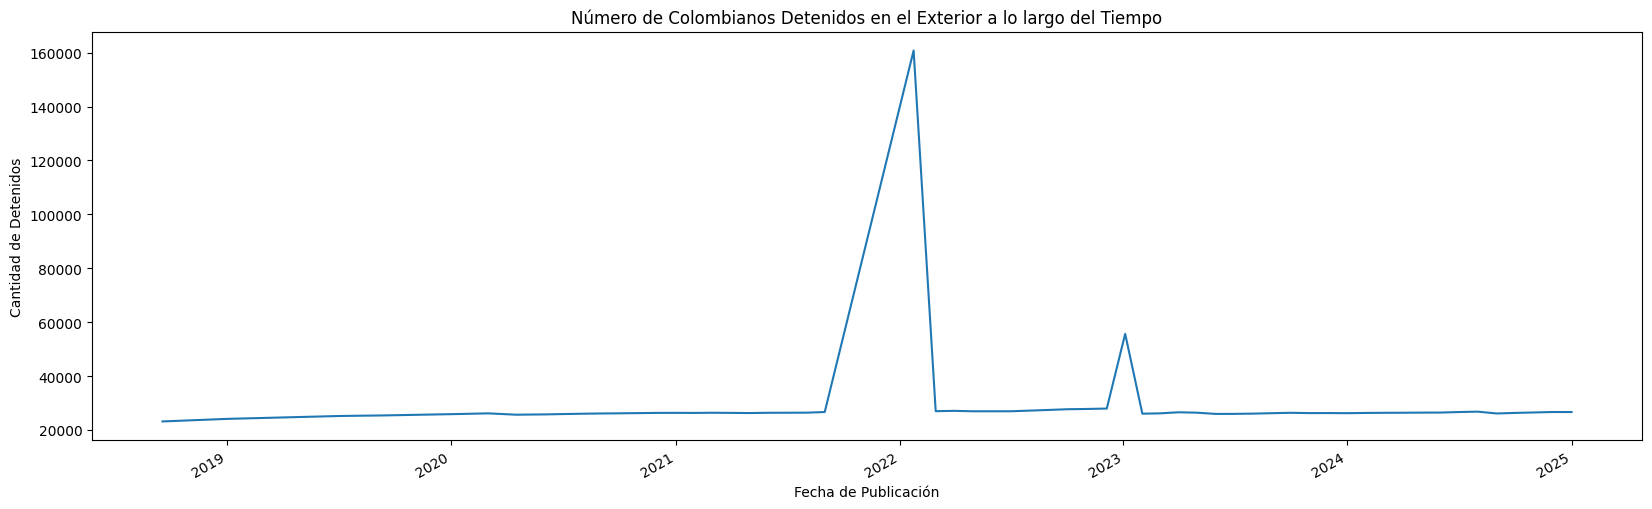

In [ ]:
# Verificar duplicados en todo el DataFrame
duplicados = df.duplicated(keep=False)  # keep=False marca todos los duplicados

print(f"Número de filas duplicadas: {duplicados.sum()}")
df[duplicados].sort_values(by=list(df.columns)).head(20)  # Muestra las primeras 20 filas ordenadas y todos los valores duplicados

Número de filas duplicadas: 43588


,FECHA PUBLICACIÓN,PAIS PRISIÓN,CONSULADO,DELITO,EXTRADITADO Y O REPATRIADO,SITUACIÓN JURÍDICA,GÉNERO,GRUPO EDAD,UBICACIÓN PAÍS,CANTIDAD,LATITUD,LONGITUD
32444,2022-01-24,ALEMANIA,C. BERLIN,DESCONOCIDO,DESCONOCIDO,EN INVESTIGACI�N,MASCULINO,DESCONOCIDO,NaN,1,51.165691,10.451526
128102,2022-01-24,ALEMANIA,C. BERLIN,DESCONOCIDO,DESCONOCIDO,EN INVESTIGACI�N,MASCULINO,DESCONOCIDO,NaN,1,51.165691,10.451526
133503,2022-01-24,ALEMANIA,C. BERLIN,DESCONOCIDO,DESCONOCIDO,EN INVESTIGACI�N,MASCULINO,DESCONOCIDO,NaN,1,51.165691,10.451526
138906,2022-01-24,ALEMANIA,C. BERLIN,DESCONOCIDO,DESCONOCIDO,EN INVESTIGACI�N,MASCULINO,DESCONOCIDO,NaN,1,51.165691,10.451526
144313,2022-01-24,ALEMANIA,C. BERLIN,DESCONOCIDO,DESCONOCIDO,EN INVESTIGACI�N,MASCULINO,DESCONOCIDO,NaN,1,51.165691,10.451526
149711,2022-01-24,ALEMANIA,C. BERLIN,DESCONOCIDO,DESCONOCIDO,EN INVESTIGACI�N,MASCULINO,DESCONOCIDO,NaN,1,51.165691,10.451526
127108,2022-01-24,ALEMANIA,C. BERLIN,LAVADO DE ACTIVOS,DESCONOCIDO,CONDENADO,MASCULINO,ADULTO MAYOR,NaN,1,51.165691,10.451526
132510,2022-01-24,ALEMANIA,C. BERLIN,LAVADO DE ACTIVOS,DESCONOCIDO,CONDENADO,MASCULINO,ADULTO MAYOR,NaN,1,51.165691,10.451526
137914,2022-01-24,ALEMANIA,C. BERLIN,LAVADO DE ACTIVOS,DESCONOCIDO,CONDENADO,MASCULINO,ADULTO MAYOR,NaN,1,51.165691,10.451526
143319,2022-01-24,ALEMANIA,C. BERLIN,LAVADO DE ACTIVOS,DESCONOCIDO,CONDENADO,MASCULINO,ADULTO MAYOR,NaN,1,51.165691,10.451526


In [ ]:
# Eliminar duplicados (si es necesario)
df.drop_duplicates(inplace=True)

In [ ]:
# Verificar duplicados en todo el DataFrame
duplicados = df.duplicated(keep=False)  # keep=False marca todos los duplicados

print(f"Número de filas duplicadas: {duplicados.sum()}")

Número de filas duplicadas: 0


Ahora se notan más concisos los datos:

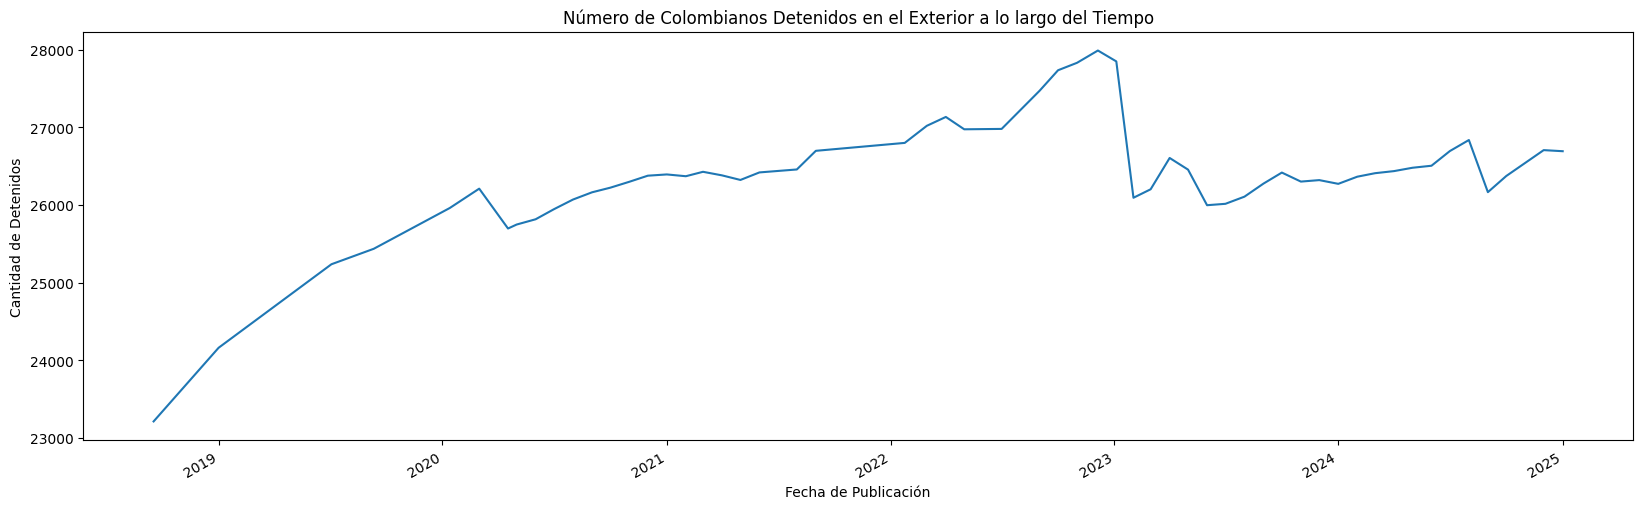

In [ ]:
df.shape[0]

331105

## Selecciono las columnas con las que voy a trabajar

In [ ]:
df.columns

Index(['FECHA PUBLICACIÓN', 'PAIS PRISIÓN', 'CONSULADO', 'DELITO',
       'EXTRADITADO Y O REPATRIADO', 'SITUACIÓN JURÍDICA', 'GÉNERO',
       'GRUPO EDAD', 'UBICACIÓN PAÍS', 'CANTIDAD', 'LATITUD', 'LONGITUD'],
      dtype='object')

In [ ]:
df_colombianos_presos = df.copy()

In [ ]:
# df_colombianos_presos = df[['FECHA PUBLICACIÓN', 'PAIS PRISIÓN', 'CONSULADO',
                                              # 'DELITO', 'GÉNERO', 'GRUPO EDAD', 'CANTIDAD']]
df_colombianos_presos.head()

,FECHA PUBLICACIÓN,PAIS PRISIÓN,CONSULADO,DELITO,EXTRADITADO Y O REPATRIADO,SITUACIÓN JURÍDICA,GÉNERO,GRUPO EDAD,UBICACIÓN PAÍS,CANTIDAD,LATITUD,LONGITUD
0,2018-09-17,ECUADOR,C. QUITO,NARCOTRÁFICO,DESCONOCIDO,EN JUICIO,MASCULINO,DESCONOCIDO,"(-1.831239, -78.183406)",45,-1.831239,-78.183406
1,2018-09-17,ITALIA,C. ROMA,OTROS,DESCONOCIDO,EN INVESTIGACIÓN,MASCULINO,DESCONOCIDO,"(41.87194, 12.56738)",1,41.871940,12.567380
2,2018-09-17,ESTADOS UNIDOS,C. NUEVA YORK,EXTORSIÓN,DESCONOCIDO,CONDENADO,MASCULINO,ADULTO,"(37.09024, -95.712891)",1,37.090240,-95.712891
3,2018-09-17,MEXICO,C. MEXICO,OTROS,DESCONOCIDO,EN INVESTIGACIÓN,MASCULINO,ADULTO JOVEN,"(23.634501, -102.552784)",7,23.634501,-102.552784
4,2018-09-17,JAPON,C. TOKIO,ROBO / HURTO,DESCONOCIDO,CONDENADO,FEMENINO,ADULTO MAYOR,"(36.204824, 138.252924)",1,36.204824,138.252924


# **5. Limpieza de datos**

## Identifico si tengo valores nulos en mis columnas

In [ ]:
df_colombianos_presos.isnull().sum()

,0
FECHA PUBLICACIÓN,0
PAIS PRISIÓN,0
CONSULADO,0
DELITO,0
EXTRADITADO Y O REPATRIADO,0
SITUACIÓN JURÍDICA,0
GÉNERO,0
GRUPO EDAD,0
UBICACIÓN PAÍS,209278
CANTIDAD,0


No hay casillas con valores nulos

## Evalúo el contenido de las columnas

In [ ]:
df_colombianos_presos['PAIS PRISIÓN'].value_counts()

,count
PAIS PRISIÓN,
DESCONOCIDO,194970
VENEZUELA,22745
ESTADOS UNIDOS,21039
ECUADOR,15499
ESPAÑA,13696
...,...
BIELORRUSIA,8
ETIOPIA,8
GUINEA,7


In [ ]:
df_colombianos_presos['CONSULADO'].value_counts()

,count
CONSULADO,
C. MADRID,20481
C. PANAMA,11000
C. SANTIAGO,10124
BTA. ASISTENCIA,10085
C. MEXICO,9936
...,...
C. OSLO,47
C. SINGAPUR,45
C. OTTAWA,26


In [ ]:
df_colombianos_presos['DELITO'].value_counts()

,count
DELITO,
NARCOTR�FICO,48753
ROBO / HURTO,40176
DESCONOCIDO,33306
NARCOTRÁFICO,29439
HOMICIDIO / TENTATIVA DE,25745
OTROS,22313
DELITOS SEXUALES,17798
PORTE ILEGAL DE ARMAS,12547
CRIMEN ORGANIZADO,9289


In [ ]:
df_colombianos_presos['GÉNERO'].value_counts()

,count
GÉNERO,
MASCULINO,260739
FEMENINO,69772
OTRO,350
DESCONOCIDO,231
NO_BINARIO,13


## Evalúo el valor "DESCONOCIDO" de "PAIS_PRISION"

Algunas columnas tienen el valor "DESCONOCIDO", esto puede indicar que quien ingresó los datos, no tenia toda la información, aunn así, debemos evaluar más a fondo como afecta este valor

In [ ]:
# Filtra las filas donde 'PAIS PRISIÓN' es desconocido
df_crr_pais_consulado = df_colombianos_presos[df_colombianos_presos['PAIS PRISIÓN'] == 'DESCONOCIDO']

# Muestra las columnas 'PAIS PRISIÓN' y 'CONSULADO' para esos registros
df_crr_pais_consulado[['PAIS PRISIÓN', 'CONSULADO']]

,PAIS PRISIÓN,CONSULADO
6,DESCONOCIDO,BTA. ASISTENCIA
27,DESCONOCIDO,C. SAN JOSE
32,DESCONOCIDO,C. GUADALAJARA
33,DESCONOCIDO,BTA. ASISTENCIA
35,DESCONOCIDO,C. LIMA
...,...,...
363696,DESCONOCIDO,C. ROMA
363697,DESCONOCIDO,C. SAN CRISTOBAL
363698,DESCONOCIDO,C. STO DOM COLORADOS
363699,DESCONOCIDO,C. LAS PALMAS DE G.C


Aunque no se registre país, si se registra el consulado, por lo tanto podemos corregir estos valores indcando a que país pertenecen.

In [ ]:
consulados_unicos = df_crr_pais_consulado['CONSULADO'].unique()
print(consulados_unicos)

['BTA. ASISTENCIA' 'C. SAN JOSE' 'C. GUADALAJARA' 'C. LIMA' 'C. BARCELONA'
 'C. NUEVA YORK' 'C. PANAMA' 'C. MADRID' 'C. NUEVA LOJA' 'C. HOUSTON'
 'C. PUERTO ESPAÑA' 'C. MIAMI' 'C. ATLANTA' 'C. PUERTO LA CRUZ'
 'C. MARACAIBO' 'C. MANAOS' 'C. ANTOFAGASTA' 'C. ROMA' 'C. BARQUISIMETO'
 'C. HONG KONG' 'DESCONOCIDA' 'C. QUITO' 'C. MEXICO' 'C. CARACAS'
 'C. TEL AVIV' 'C. LONDRES' 'C. PUERTO ORDAZ' 'C. LAS PALMAS DE G.C'
 'C. BUENOS AIRES' 'C. MILAN' 'C. GUAYAQUIL' 'C. ASUNCION'
 'C. SAN CRISTOBAL' 'C. TEGUCIGALPA' 'C. BRUSELAS' 'C. NUEVA DELHI'
 'C. SAN FRANCISCO' 'C. ESTOCOLMO' 'C. VALENCIA VEN' 'C. SEVILLA'
 'C. ESMERALDAS' 'C. BILBAO' 'C. RABAT' 'C. SANTIAGO' 'C. LA HABANA'
 'C. WASHINGTON' 'C. LISBOA' 'C. EL AMPARO' 'C. NEWARK' 'C. PARIS'
 'C. SAN CARLOS DE ZULIA' 'C. ORLANDO' 'C. BEIJING' 'C. SYDNEY' 'C. VIENA'
 'C. SAN SALVADOR' 'C. BARINAS' 'C. CALGARY' 'C. BRASILIA'
 'C. STO DOM COLORADOS' 'C. GUANGZHOU' 'C. PALMA DE MALLORCA'
 'C. LOS ANGELES' 'C. VALENCIA ESP' 'C. SEUL' 'C. SAO PAUL

Notamos que existe el valor "DESCONOCIDA"

Por ello realizaremos otro filtrado para determinar, si por ejemplo, mediante coordenadas podriamos obtener el país

In [ ]:
# Filter rows where 'PAIS PRISIÓN' and 'CONSULADO' are 'DESCONOCIDO'
df_eval_log_lat = df[(df['PAIS PRISIÓN'] == 'DESCONOCIDO') & (df['CONSULADO'] == 'DESCONOCIDA')]

Revisamos que valores contienen esas columnas

In [ ]:
desc_lat = df_eval_log_lat['LATITUD'].unique()
print(desc_lat)

desc_log= df_eval_log_lat['LONGITUD'].unique()
print(desc_log)

[ 0.             nan 38.963745]
[ 0.             nan 35.243322]


No tiene valores significativos

Obtenido los consulados, le podemos pedir a una IA que cree un diccionario relacionando cada consulado con su país correspondiente

In [ ]:
consulado_a_pais = {
    'BTA. ASISTENCIA': 'COLOMBIA',
    'C. SAN JOSE': 'COSTA RICA',
    'C. GUADALAJARA': 'MÉXICO',
    'C. LIMA': 'PERÚ',
    'C. BARCELONA': 'ESPAÑA',
    'C. NUEVA YORK': 'ESTADOS UNIDOS',
    'C. PANAMA': 'PANAMÁ',
    'C. MADRID': 'ESPAÑA',
    'C. NUEVA LOJA': 'ECUADOR',
    'C. HOUSTON': 'ESTADOS UNIDOS',
    'C. PUERTO ESPAÑA': 'TRINIDAD Y TOBAGO',
    'C. MIAMI': 'ESTADOS UNIDOS',
    'C. ATLANTA': 'ESTADOS UNIDOS',
    'C. PUERTO LA CRUZ': 'VENEZUELA',
    'C. MARACAIBO': 'VENEZUELA',
    'C. MANAOS': 'BRASIL',
    'C. ANTOFAGASTA': 'CHILE',
    'C. ROMA': 'ITALIA',
    'C. BARQUISIMETO': 'VENEZUELA',
    'C. HONG KONG': 'CHINA',  # Región administrativa especial
    'DESCONOCIDA': 'DESCONOCIDO',  # Mantener para manejar este caso luego
    'C. QUITO': 'ECUADOR',
    'C. MEXICO': 'MÉXICO',
    'C. CARACAS': 'VENEZUELA',
    'C. TEL AVIV': 'ISRAEL',
    'C. LONDRES': 'REINO UNIDO',
    'C. PUERTO ORDAZ': 'VENEZUELA',
    'C. LAS PALMAS DE G.C': 'ESPAÑA',
    'C. BUENOS AIRES': 'ARGENTINA',
    'C. MILAN': 'ITALIA',
    'C. GUAYAQUIL': 'ECUADOR',
    'C. ASUNCION': 'PARAGUAY',
    'C. SAN CRISTOBAL': 'VENEZUELA',  # Asumiendo San Cristóbal, Táchira
    'C. TEGUCIGALPA': 'HONDURAS',
    'C. BRUSELAS': 'BÉLGICA',
    'C. NUEVA DELHI': 'INDIA',
    'C. SAN FRANCISCO': 'ESTADOS UNIDOS',
    'C. ESTOCOLMO': 'SUECIA',
    'C. VALENCIA VEN': 'VENEZUELA', # Valencia, Venezuela
    'C. ESMERALDAS': 'ECUADOR',
    'C. BILBAO': 'ESPAÑA',
    'C. RABAT': 'MARRUECOS',
    'C. SANTIAGO': 'CHILE',
    'C. LA HABANA': 'CUBA',
    'C. WASHINGTON': 'ESTADOS UNIDOS',
    'C. LISBOA': 'PORTUGAL',
    'C. EL AMPARO': 'VENEZUELA', #El Amparo, Venezuela. Verificar si es correcto.
    'C. NEWARK': 'ESTADOS UNIDOS',
    'C. PARIS': 'FRANCIA',
    'C. SAN CARLOS DE ZULIA': 'VENEZUELA',
    'C. ORLANDO': 'ESTADOS UNIDOS',
    'C. BEIJING': 'CHINA',
    'C. SYDNEY': 'AUSTRALIA',
    'C. VIENA': 'AUSTRIA',
    'C. SAN SALVADOR': 'EL SALVADOR',
    'C. BARINAS': 'VENEZUELA',
    'C. CALGARY': 'CANADÁ',
    'C. BRASILIA': 'BRASIL',
    'C. STO DOM COLORADOS': 'REPÚBLICA DOMINICANA', #  Santo Domingo (supuesto)
    'C. GUANGZHOU': 'CHINA',
    'C. PALMA DE MALLORCA': 'ESPAÑA',
    'C. LOS ANGELES': 'ESTADOS UNIDOS',
    'C. VALENCIA ESP': 'ESPAÑA', # Valencia, España
    'C. SEUL': 'COREA DEL SUR',
    'C. SEVILLA': 'ESPAÑA',
    'C. SAO PAULO': 'BRASIL',
    'C. SAN ANT DE TACHIRA': 'VENEZUELA', # San Antonio del Táchira
    'C. GUATEMALA': 'GUATEMALA',
    'C. BOSTON': 'ESTADOS UNIDOS',
    'C. COLON': 'PANAMÁ',  # Asumiendo Colón, Panamá
    'C. BERNA': 'SUIZA',
    'C. ANKARA': 'TURQUÍA',
    'C. MONTEVIDEO': 'URUGUAY',
    'C. SAN FNDO ATABAPO': 'VENEZUELA',  # San Fernando de Atabapo
    'C. TULCAN': 'ECUADOR',
    'C. EL CAIRO': 'EGIPTO',
    'C. SANTO DOMINGO': 'REPÚBLICA DOMINICANA',
    'C. CHICAGO': 'ESTADOS UNIDOS',
    'C. AMSTERDAM': 'PAÍSES BAJOS',
    'C. LA PAZ': 'BOLIVIA',
    'C. MERIDA VEN': 'VENEZUELA',  # Mérida, Venezuela
    'C. IQUITOS': 'PERÚ',
    'C. CANBERRA': 'AUSTRALIA',
    'C. FRANKFURT': 'ALEMANIA',
    'C. KINGSTON': 'JAMAICA',
    'C. MOSCU': 'RUSIA',
    'C. SAN JUAN PTO RICO': 'PUERTO RICO', # Considerar si se trata como país o territorio de EE. UU.
    'C. VARSOVIA': 'POLONIA',
    'C. ARUBA': 'ARUBA', # Considerar si se trata como país o territorio de Países Bajos.
    'C. ABU DHABI': 'EMIRATOS ÁRABES UNIDOS',
    'C. MANAGUA': 'NICARAGUA',
    'C. TORONTO': 'CANADÁ',
    'C. CANCUN': 'MÉXICO',
    'C. KUALA LUMPUR': 'MALASIA',
    'C. TOKIO': 'JAPÓN',
    'C. BERLIN': 'ALEMANIA',
    'SC. TEL AVIV': 'ISRAEL', # Probable error tipográfico, debería ser C. TEL AVIV
    'C. LA HAYA': 'PAÍSES BAJOS',
    'C. SHANGHAI': 'CHINA',
    'C. PUERTO ESPA�A': 'TRINIDAD Y TOBAGO', #  Error de codificación, mismo que 'C. PUERTO ESPAÑA'
    'C. BUDAPEST': 'HUNGRÍA',
    'C. MACHIQUES': 'VENEZUELA',
    'C. WILLEMSTAD': 'CURAZAO',  # Considerar si se trata como país o territorio de Países Bajos.
    'C. AUCKLAND': 'NUEVA ZELANDA',
    'C. ACRA': 'GHANA',
    'C. MONTREAL': 'CANADÁ',
    'C. BANGKOK': 'TAILANDIA',
    'C. HANOI': 'VIETNAM',
    'C. NAIROBI': 'KENIA',
    'C. TABATINGA': 'BRASIL',
    'C. PUERTO AYACUCHO': 'VENEZUELA',
    'C. OSLO': 'NORUEGA',
    'C. MANILA': 'FILIPINAS',
    'C. PRETORIA': 'SUDÁFRICA',
    'C. JAKARTA': 'INDONESIA',
    'C. VANCOUVER': 'CANADÁ',
    'C. OTTAWA': 'CANADÁ',
    'C. SINGAPUR': 'SINGAPUR'
}

Notamos que la IA tiene algunas dudas
Manualmente he vericado sus dudas en la pagina de la cancilleria de Colombia determinando que el diccionario es correcto

**NOTA:** una forma manual no es siempre recomendada porque son valores que constantemente se mantienen actualizando.

- Si este proyecto no fuese con fines educativos propondria que obtengas una API key con geminis y sea el encargado de generar y/o actualizar el diccionario cada que sea necesario.

- Otra alternativa es jugar con las coordenadas que la base de datos ofrece para una mayor verificación de los datos obtenidos.

Tu decides cual es el mejor camino

In [ ]:
# Se actualiza la columna PAIS PRISIÓN de acuerdo al mapeo del diccionario
df_colombianos_presos.loc[:, 'PAIS PRISIÓN'] = df_colombianos_presos['CONSULADO'].map(consulado_a_pais).fillna(df_colombianos_presos['PAIS PRISIÓN'])
df_colombianos_presos[['PAIS PRISIÓN', 'CONSULADO']].head()

,PAIS PRISIÓN,CONSULADO
0,ECUADOR,C. QUITO
1,ITALIA,C. ROMA
2,ESTADOS UNIDOS,C. NUEVA YORK
3,MÉXICO,C. MEXICO
4,JAPÓN,C. TOKIO


`map(consulado_a_pais)`: Usa el diccionario para buscar el país correspondiente a cada valor en la columna 'CONSULADO'.

`fillna(df_colombianos_presos['PAIS PRISIÓN'])`: Si un valor de 'CONSULADO' no se encuentra en el diccionario, esta parte del código conserva el valor original de "PAIS PRISIÓN". Esto evita que se introduzcan valores NaN en el DataFrame.

Procedemos a eliminar toda fila que tenga valor "DESCONOCIDO" en columnas importantes que afectan el flujo del estudio, como: "PAIS PRISIÓN

In [ ]:
# Eliminar filas con un valor específico (en este caso, "DESCONOCIDO" en la columna 'PAIS PRISION')
df_colombianos_presos = df_colombianos_presos[df_colombianos_presos['PAIS PRISIÓN'] != 'DESCONOCIDO']

Ya no me interesa trabajar con la columna CONSULADO, por ello la dropeo

In [ ]:
df_colombianos_presos = df_colombianos_presos.drop('CONSULADO', axis=1)

## Identifico que los datos esten correctamente escritos

Mientras que para "DELITO" y "GÉNERO", se decide categorizar como "OTRO" y agrupar esa nueva cantidad re-clasificada, con la ya existente.

También se realiza el mapeo de correcciones para la columna "DELITO"

### DELITO

In [ ]:
# Crear un diccionario de mapeo de correcciones
correcciones = {'NARCOTR�FICO': 'NARCOTRÁFICO', 'DESCONOCIDO': 'OTRO',
                'OTROS': 'OTRO', 'NO REPORTA � CONFIDENCIALIDAD ESTATAL': 'NO REPORTA – CONFIDENCIALIDAD ESTATAL',
                'EXTORSI�N': 'EXTORSIÓN', 'CONDUCCI�N TEMERARIA': 'CONDUCCIÓN TEMERARIA',
                'DA�OS': 'DAÑOS', 'FALSIFICACI�N': 'FALSIFICACIÓN', 'COACCI�N': 'COACCIÓN',
                'DELITOS POL�TICOS': 'DELITOS POLÍTICOS',
                'CELEBRACI�N INDEBIDA DE CONTRATOS': 'CELEBRACIÓN INDEBIDA DE CONTRATOS'}

# Aplicar las correcciones a la columna 'DELITO'
df_colombianos_presos['DELITO'] = df_colombianos_presos['DELITO'].replace(correcciones)

In [ ]:
df_colombianos_presos['DELITO'].value_counts()

,count
DELITO,
NARCOTRÁFICO,78190
OTRO,55010
ROBO / HURTO,40174
HOMICIDIO / TENTATIVA DE,25745
DELITOS SEXUALES,17798
PORTE ILEGAL DE ARMAS,12547
NO REPORTA – CONFIDENCIALIDAD ESTATAL,10309
CRIMEN ORGANIZADO,9289
SECUESTRO,9126


In [ ]:
mapeo_delitos = {
    'NARCOTRÁFICO': 'NARCOTRÁFICO',
    'OTRO': 'OTRO',
    'EXTORSIÓN': 'EXTORSIÓN',
    'ROBO / HURTO': 'ROBO',
    'DELITO MIGRATORIO': 'DELITO MIGRATORIO',
    'NO REPORTA – CONFIDENCIALIDAD ESTATAL': 'NO REPORTA',
    'HOMICIDIO / TENTATIVA DE': 'HOMICIDIO',
    'PORTE ILEGAL DE ARMAS': 'PORTE ILEGAL DE ARMAS',
    'CRIMEN ORGANIZADO': 'CRIMEN ORGANIZADO',
    'DAÑOS': 'DAÑOS',
    'DELITOS SEXUALES': 'DELITOS SEXUALES',
    'LESIONES PERSONALES': 'LESIONES PERSONALES',
    'CONTRABANDO': 'CONTRABANDO',
    'CELEBRACIÓN INDEBIDA DE CONTRATOS': 'DELITOS CONTRA LA ADMINISTRACIÓN PÚBLICA',
    'TERRORISMO': 'DELITOS CONTRA EL ESTADO',
    'SECUESTRO': 'SECUESTRO',
    'FALSEDAD EN DOCUMENTO': 'DELITOS FINANCIEROS',
    'LAVADO DE ACTIVOS': 'DELITOS FINANCIEROS',
    'FALSIFICACIÓN': 'DELITOS FINANCIEROS',
    'FRAUDE / ESTAFA': 'FRAUDE',
    'DESACATO A LA AUTORIDAD': 'DELITOS CONTRA LA ADMINISTRACIÓN PÚBLICA',
    'AMENAZAS': 'AMENAZAS',
    'VIOLENCIA INTRAFAMILIAR': 'VIOLENCIA DE GÉNERO',
    'ALLANAMIENTO': 'ALLANAMIENTO',
    'TRATA DE PERSONAS': 'TRATA DE PERSONAS',
    'CONDUCCIÓN TEMERARIA': 'CONDUCCIÓN TEMERARIA',
    'VIOLENCIA DE GENERO': 'VIOLENCIA DE GÉNERO',
    'FALSO TESTIMONIO': 'FALSO TESTIMONIO',
    'DELITOS POLÍTICOS': 'DELITOS CONTRA EL ESTADO',
    'COACCIÓN': 'COACCIÓN'
}

In [ ]:
df_colombianos_presos['DELITO'] = df_colombianos_presos['DELITO'].map(mapeo_delitos)

In [ ]:
df_colombianos_presos['DELITO'].unique()

array(['NARCOTRÁFICO', 'OTRO', 'EXTORSIÓN', 'ROBO', 'DELITO MIGRATORIO',
       'NO REPORTA', 'HOMICIDIO', 'PORTE ILEGAL DE ARMAS',
       'CRIMEN ORGANIZADO', 'DAÑOS', 'DELITOS SEXUALES',
       'LESIONES PERSONALES', 'CONTRABANDO',
       'DELITOS CONTRA LA ADMINISTRACIÓN PÚBLICA',
       'DELITOS CONTRA EL ESTADO', 'SECUESTRO', 'DELITOS FINANCIEROS',
       'FRAUDE', 'AMENAZAS', 'VIOLENCIA DE GÉNERO', 'ALLANAMIENTO',
       'TRATA DE PERSONAS', 'CONDUCCIÓN TEMERARIA', 'FALSO TESTIMONIO',
       'COACCIÓN'], dtype=object)

### SITUACIÓN JURÍDICA

In [ ]:
df_colombianos_presos['SITUACIÓN JURÍDICA'].value_counts()

,count
SITUACIÓN JURÍDICA,
CONDENADO,139173
EN INVESTIGACI�N,76038
EN JUICIO,47306
EN INVESTIGACIÓN,44254
NO REPORTA - CONFIDENCIALIDAD ESTATAL,10459
EN ESPERA DE DEPORTACI�N,8088
EN ESPERA DE DEPORTACIÓN,4047
EXTRADITADO,1127


In [ ]:
# Crear un diccionario de mapeo de correcciones
correcciones = {'EN INVESTIGACI�N': 'EN INVESTIGACIÓN', 'EN ESPERA DE DEPORTACI�N': 'EN ESPERA DE DEPORTACIÓN'}

# Aplicar las correcciones a la columna 'SITUACIÓN JURÍDICA'
df_colombianos_presos['SITUACIÓN JURÍDICA'] = df_colombianos_presos['SITUACIÓN JURÍDICA'].replace(correcciones)

In [ ]:
df_colombianos_presos['SITUACIÓN JURÍDICA'].value_counts()

,count
SITUACIÓN JURÍDICA,
CONDENADO,139173
EN INVESTIGACIÓN,120292
EN JUICIO,47306
EN ESPERA DE DEPORTACIÓN,12135
NO REPORTA - CONFIDENCIALIDAD ESTATAL,10459
EXTRADITADO,1127


### GÉNERO

In [ ]:
# Crear un diccionario de mapeo de correcciones
correcciones = {'DESCONOCIDO': 'OTRO'}

# Aplicar las correcciones a la columna 'GÉNERO'
df_colombianos_presos['GÉNERO'] = df_colombianos_presos['GÉNERO'].replace(correcciones)


In [ ]:
df_colombianos_presos['GÉNERO'].value_counts()

,count
GÉNERO,
MASCULINO,260317
FEMENINO,69581
OTRO,581
NO_BINARIO,13


In [ ]:
df_colombianos_presos.columns

Index(['FECHA PUBLICACIÓN', 'PAIS PRISIÓN', 'DELITO',
       'EXTRADITADO Y O REPATRIADO', 'SITUACIÓN JURÍDICA', 'GÉNERO',
       'GRUPO EDAD', 'UBICACIÓN PAÍS', 'CANTIDAD', 'LATITUD', 'LONGITUD'],
      dtype='object')

### PAIS PRISIÓN

Se identifica que para "PAIS PRISIÓN", hay paises mal escritos y datos que no son paises, se realiza un mapeo para corregirlos

In [ ]:
# Crear un diccionario de mapeo de correcciones
correcciones = {'ESPA�A': 'ESPAÑA', 'CURA�AO': 'CURAÇAO'}

# Aplicar las correcciones a la columna 'Nombre'
df_colombianos_presos['PAIS PRISIÓN'] = df_colombianos_presos['PAIS PRISIÓN'].replace(correcciones)

In [ ]:
df_colombianos_presos['PAIS PRISIÓN'].value_counts()

,count
PAIS PRISIÓN,
VENEZUELA,51021
ESPAÑA,49320
ESTADOS UNIDOS,48469
ECUADOR,34412
CHILE,14862
...,...
HUNGRÍA,82
FINLANDIA,55
NORUEGA,47


## Modificación de la columna FECHA PUBLICACIÓN

In [ ]:
# Se convierte 'FECHA PUBLICACIÓN' a tipo fecha
df_colombianos_presos['FECHA PUBLICACIÓN'] = pd.to_datetime(df['FECHA PUBLICACIÓN'])

# Extraer el mes y crear la nueva columna 'MES'
df_colombianos_presos['MES'] = df_colombianos_presos['FECHA PUBLICACIÓN'].dt.month

# Extraer el año y crear la nueva columna 'AÑO'
df_colombianos_presos['AÑO'] = df_colombianos_presos['FECHA PUBLICACIÓN'].dt.year

df_colombianos_presos

,FECHA PUBLICACIÓN,PAIS PRISIÓN,DELITO,EXTRADITADO Y O REPATRIADO,SITUACIÓN JURÍDICA,GÉNERO,GRUPO EDAD,UBICACIÓN PAÍS,CANTIDAD,LATITUD,LONGITUD,MES,AÑO
0,2018-09-17,ECUADOR,NARCOTRÁFICO,DESCONOCIDO,EN JUICIO,MASCULINO,DESCONOCIDO,"(-1.831239, -78.183406)",45,-1.831239,-78.183406,9,2018
1,2018-09-17,ITALIA,OTRO,DESCONOCIDO,EN INVESTIGACIÓN,MASCULINO,DESCONOCIDO,"(41.87194, 12.56738)",1,41.871940,12.567380,9,2018
2,2018-09-17,ESTADOS UNIDOS,EXTORSIÓN,DESCONOCIDO,CONDENADO,MASCULINO,ADULTO,"(37.09024, -95.712891)",1,37.090240,-95.712891,9,2018
3,2018-09-17,MÉXICO,OTRO,DESCONOCIDO,EN INVESTIGACIÓN,MASCULINO,ADULTO JOVEN,"(23.634501, -102.552784)",7,23.634501,-102.552784,9,2018
4,2018-09-17,JAPÓN,ROBO,DESCONOCIDO,CONDENADO,FEMENINO,ADULTO MAYOR,"(36.204824, 138.252924)",1,36.204824,138.252924,9,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
363696,2025-05-01,ITALIA,OTRO,DESCONOCIDO,EN INVESTIGACIÓN,MASCULINO,DESCONOCIDO,NaN,1,35.937496,14.375416,5,2025
363697,2025-05-01,VENEZUELA,ROBO,DESCONOCIDO,CONDENADO,MASCULINO,ADULTO,NaN,2,NaN,NaN,5,2025
363698,2025-05-01,REPÚBLICA DOMINICANA,NARCOTRÁFICO,DESCONOCIDO,CONDENADO,MASCULINO,DESCONOCIDO,NaN,1,-1.831239,-78.183406,5,2025
363699,2025-05-01,ESPAÑA,FRAUDE,DESCONOCIDO,CONDENADO,FEMENINO,ADULTO,NaN,1,40.463667,-3.749220,5,2025


In [ ]:
df.columns

Index(['FECHA PUBLICACIÓN', 'PAIS PRISIÓN', 'CONSULADO', 'DELITO',
       'EXTRADITADO Y O REPATRIADO', 'SITUACIÓN JURÍDICA', 'GÉNERO',
       'GRUPO EDAD', 'UBICACIÓN PAÍS', 'CANTIDAD', 'LATITUD', 'LONGITUD'],
      dtype='object')

In [ ]:
df_colombianos_presos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330492 entries, 0 to 363700
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   FECHA PUBLICACIÓN           330492 non-null  datetime64[ns]
 1   PAIS PRISIÓN                330492 non-null  object        
 2   DELITO                      330492 non-null  object        
 3   EXTRADITADO Y O REPATRIADO  330492 non-null  object        
 4   SITUACIÓN JURÍDICA          330492 non-null  object        
 5   GÉNERO                      330492 non-null  object        
 6   GRUPO EDAD                  330492 non-null  object        
 7   UBICACIÓN PAÍS              121588 non-null  object        
 8   CANTIDAD                    330492 non-null  int64         
 9   LATITUD                     286374 non-null  float64       
 10  LONGITUD                    286374 non-null  float64       
 11  MES                         330492 non-null 

# **6. Gráficas estadísticas**

**===3.1 Relación del número de presos con respecto a la fecha===**

In [ ]:
select = ['AÑO', 'CANTIDAD']    #Selección de columnas a trabajar
groups = ['AÑO']    #Selección de columnas que agrupará la información

comportamiento_delitos = df_colombianos_presos[select].groupby(by = groups).sum()    #Creación de nuevo dataframe y le aplicamos la función sum

comportamiento_delitos.reset_index(inplace = True)    #Creación de índices numéricos

comportamiento_delitos    #Se imprime el dataframe para visualizar los datos

,AÑO,CANTIDAD
0,2018,23213
1,2019,74832
2,2020,286499
3,2021,211458
4,2022,245918
5,2023,316623
6,2024,291228
7,2025,107644


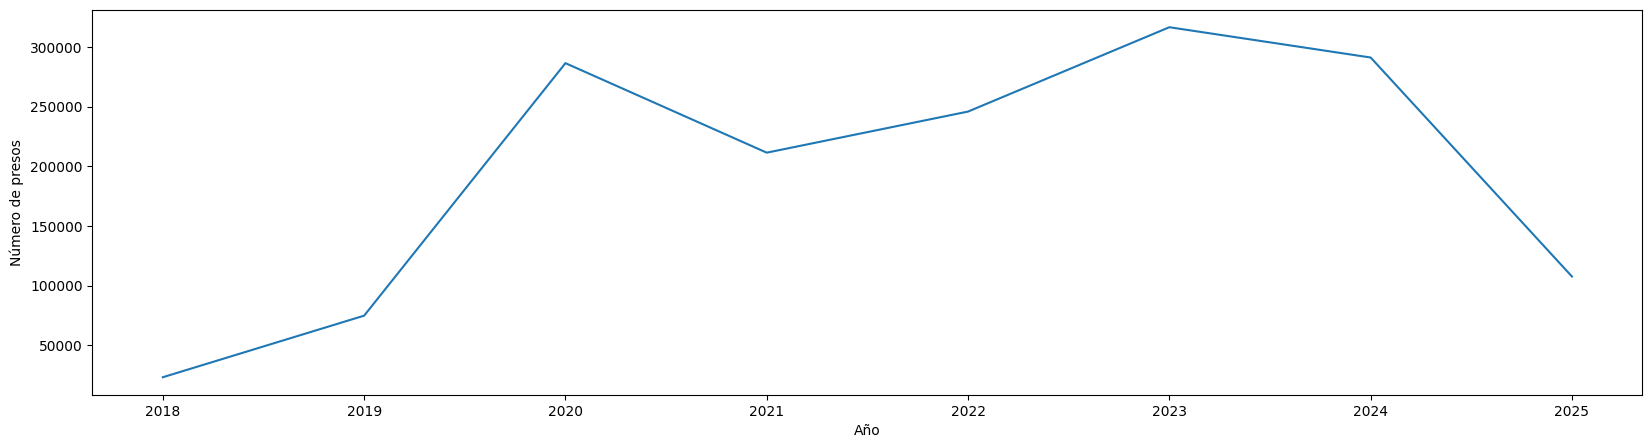

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data = comportamiento_delitos, x = "AÑO", y = "CANTIDAD");
plt.ylabel('Número de presos');
plt.xlabel('Año');

#Creación de gráfico para visualizar el comportamiento

**===3.1 Relación del número de presos con respecto al mes===**

In [ ]:
select = ['MES', 'CANTIDAD']    #Selección de columnas a trabajar
groups = ['MES']    #Selección de columnas que agrupará la información

mes_delito = df_colombianos_presos[select].groupby(by = groups).sum()    #Creación de nuevo dataframe y le aplicamos la función sum

mes_delito.reset_index(inplace = True)    #Creación de índices numéricos

mes_delito

,MES,CANTIDAD
0,1,184120
1,2,105619
2,3,159266
3,4,159401
4,5,131973
5,6,104733
6,7,130866
7,8,105466
8,9,181414
9,10,106743


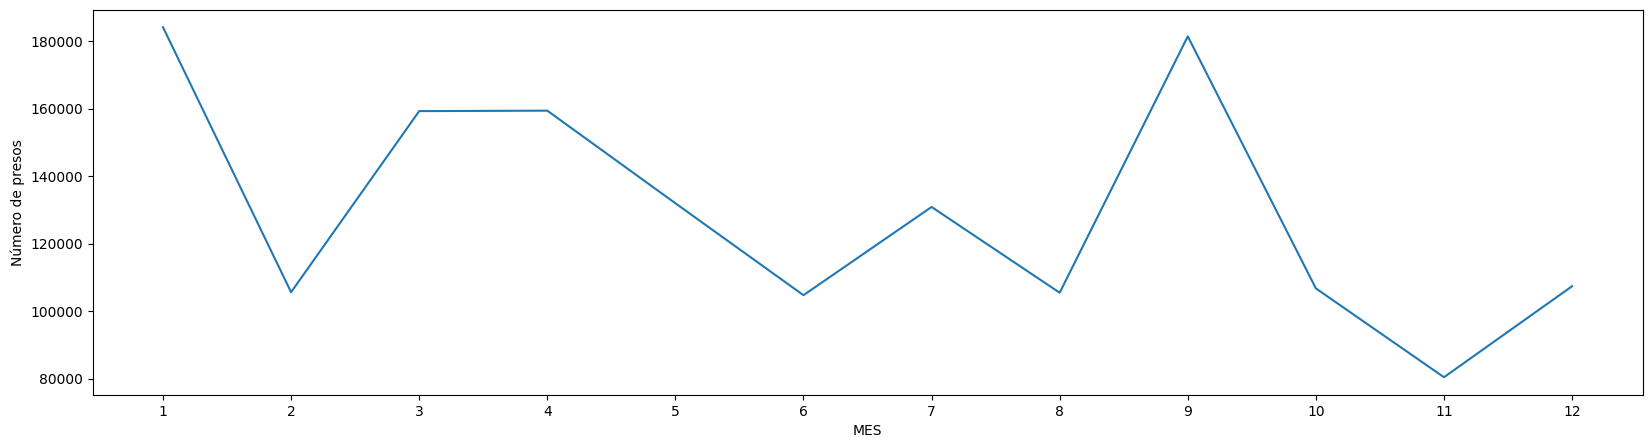

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data = mes_delito, x = "MES", y = "CANTIDAD");
plt.ylabel('Número de presos');
plt.xlabel('MES');
plt.xticks(mes_delito['MES'])

plt.show()

**===3.2 Top 5 de relación del número de presos con el país donde están recluidos ===**

In [ ]:
select2 = ['PAIS PRISIÓN', 'CANTIDAD']
groups2 = ['PAIS PRISIÓN']

#Creación de nuevo dataframe y le aplicamos la función sum
pais_mayor_detencion = df_colombianos_presos[select2].groupby(by = groups2).sum()


#Ordenar el dataframe descendentemente con respecto a la columna 'CANTIDAD'
pais_mayor_detencion = pais_mayor_detencion.sort_values(by = 'CANTIDAD', ascending = False)

pais_mayor_detencion.reset_index(inplace = True)    #Creación de índices numéricos

pais_mayor_detencion.head(10)    #Se imprime el dataframe para visualizar los datos

,PAIS PRISIÓN,CANTIDAD
0,ESPAÑA,292617
1,ECUADOR,251618
2,ESTADOS UNIDOS,231684
3,VENEZUELA,206982
4,PANAMÁ,116330
5,CHILE,97028
6,MÉXICO,52889
7,PERÚ,49461
8,COLOMBIA,48617
9,ARGENTINA,38543


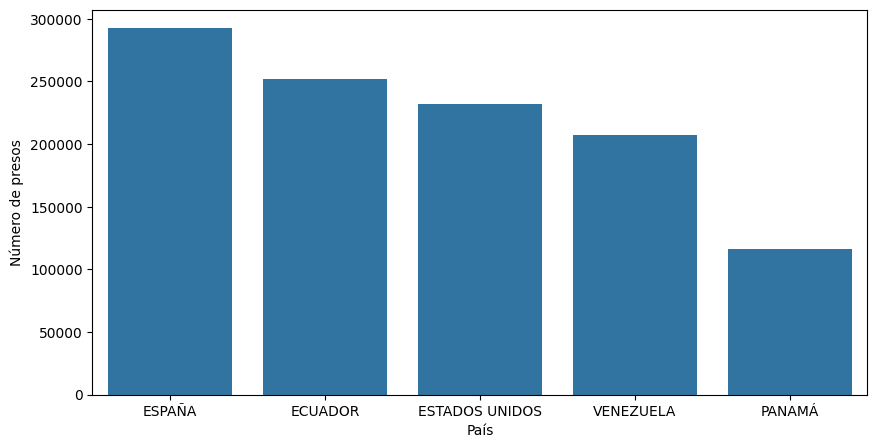

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data = pais_mayor_detencion.head(5), x = "PAIS PRISIÓN", y = "CANTIDAD");
plt.ylabel('Número de presos');
plt.xlabel('País');


In [ ]:
#Guardar el nombre del pais con mayor detención de colombianos en una variable
nombre_pais = pais_mayor_detencion['PAIS PRISIÓN'][0]

#Guardar la cantidad de presos en una variable
cantidad_presos = pais_mayor_detencion['CANTIDAD'][0]

**===3.3 Top 5 de relación del número de presos con respecto al tipo de delito cometido===**

In [ ]:
select3 = ['DELITO', 'CANTIDAD']
groups3 = ['DELITO']

delito_mayor_cometido = df_colombianos_presos[select3].groupby(by = groups3).sum()

delito_mayor_cometido = delito_mayor_cometido.sort_values(by = 'CANTIDAD', ascending = False)

delito_mayor_cometido.reset_index(inplace = True)

delito_mayor_cometido.head(10)

,DELITO,CANTIDAD
0,NARCOTRÁFICO,692370
1,OTRO,286032
2,ROBO,198639
3,HOMICIDIO,76048
4,NO REPORTA,44587
5,DELITOS SEXUALES,43462
6,PORTE ILEGAL DE ARMAS,29631
7,DELITO MIGRATORIO,26635
8,SECUESTRO,20944
9,DELITOS FINANCIEROS,20510


([0, 1, 2, 3, 4],
 [Text(0, 0, 'NARCOTRÁFICO'),
  Text(1, 0, 'OTRO'),
  Text(2, 0, 'ROBO'),
  Text(3, 0, 'HOMICIDIO'),
  Text(4, 0, 'NO REPORTA')])

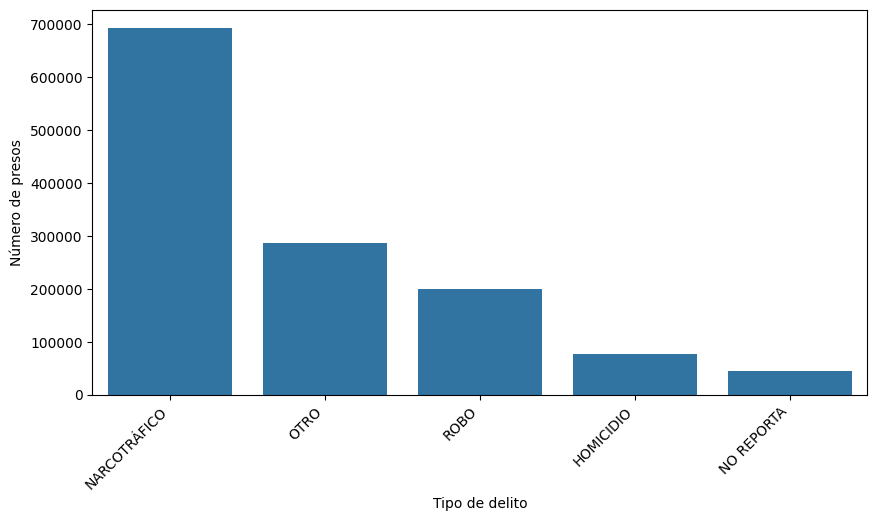

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data = delito_mayor_cometido.head(5), x = "DELITO", y = "CANTIDAD");
plt.ylabel('Número de presos');
plt.xlabel('Tipo de delito');
plt.xticks(rotation = 45, ha = 'right')

In [ ]:
nombre_delito = delito_mayor_cometido['DELITO'][0]
cantidad_delitos = delito_mayor_cometido['CANTIDAD'][0]

**===3.4 Relación del número de presos con respecto al rango edad cuando cometen un delito===**



In [ ]:
select4 = ['GRUPO EDAD', 'CANTIDAD']
groups4 = ['GRUPO EDAD']

edades_con_mas_delitos = df_colombianos_presos[select4].groupby(by = groups4).sum()

edades_con_mas_delitos = edades_con_mas_delitos.sort_values(by = 'CANTIDAD', ascending = False)

edades_con_mas_delitos.reset_index(inplace = True)

edades_con_mas_delitos

,GRUPO EDAD,CANTIDAD
0,ADULTO,785347
1,DESCONOCIDO,544350
2,ADULTO JOVEN,112854
3,ADULTO MAYOR,111709
4,PRIMERA INFANCIA,1382
5,ADOLESCENTE,947
6,INFANTE,826


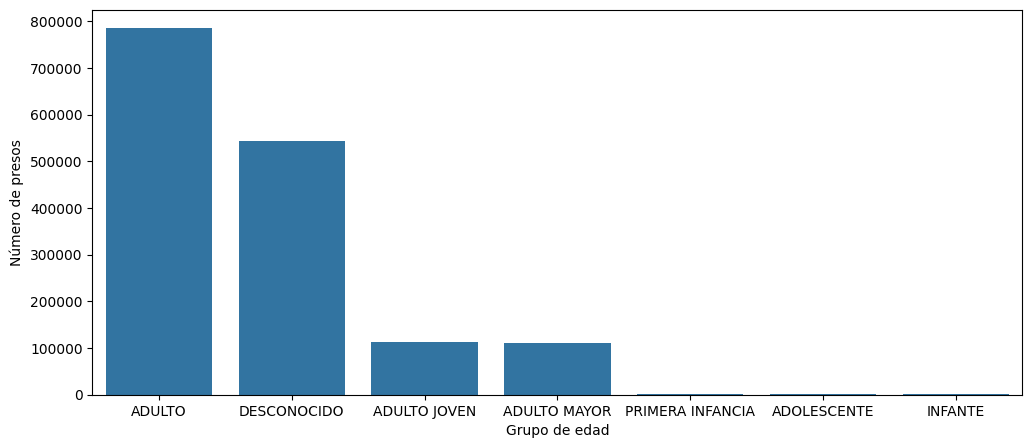

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(data = edades_con_mas_delitos, x = "GRUPO EDAD", y = "CANTIDAD");
plt.ylabel('Número de presos');
plt.xlabel('Grupo de edad');


In [ ]:
grupo_edad = edades_con_mas_delitos['GRUPO EDAD'][0]
cantidad_edades = edades_con_mas_delitos['CANTIDAD'][0]

**===3.5 Relación del número de presos con respecto al género de quienes cometen el delito===**



In [ ]:
select5 = ['GÉNERO', 'CANTIDAD']
groups5 = ['GÉNERO']

generos = df_colombianos_presos[select5].groupby(by = groups5).sum()

generos = generos.sort_values(by = 'CANTIDAD', ascending = False)

generos.reset_index(inplace = True)

generos

,GÉNERO,CANTIDAD
0,MASCULINO,1361228
1,FEMENINO,195605
2,OTRO,570
3,NO_BINARIO,12


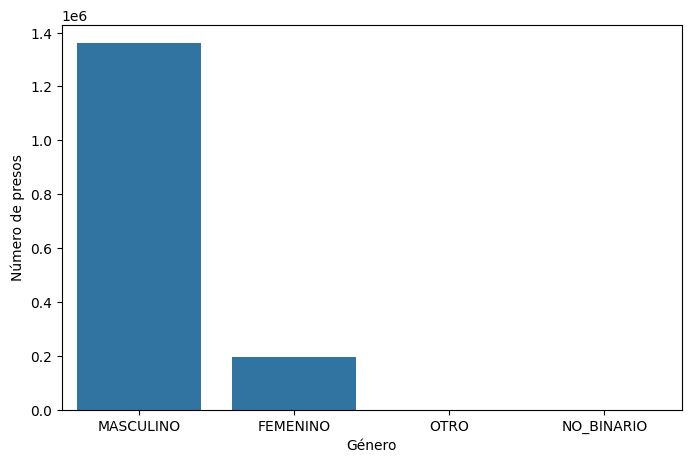

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data = generos, x = "GÉNERO", y = "CANTIDAD");
plt.ylabel('Número de presos');
plt.xlabel('Género');


In [ ]:
genero_mas_detenido = generos['GÉNERO'][0]

In [ ]:
select4 = ['DELITO', 'MES', 'CANTIDAD']
groups4 = ['DELITO', 'MES']

delito_mes_cant = df_colombianos_presos[select4].groupby(by = groups4).sum()

delito_mes_cant = delito_mes_cant.sort_values(by = 'CANTIDAD', ascending = False)

delito_mes_cant.reset_index(inplace = True)

delito_mes_cant.head()

,DELITO,MES,CANTIDAD
0,NARCOTRÁFICO,1,82102
1,NARCOTRÁFICO,9,81194
2,NARCOTRÁFICO,3,70639
3,NARCOTRÁFICO,4,70580
4,NARCOTRÁFICO,5,58866


# **7. Mapas mundiales con escala policromatica**

**===4.1 Corrección de datos geográficos===**

In [ ]:
#Nuevo df con nombres de paises corregidos

DF_NUEVO = df_colombianos_presos.replace({"BELGICA": "Bélgica","BONAIRE": "Bonaire",
                   "CANADA":"Canadá" , "COREA, REPUBLICA DE":"Corea del Sur","CURAÇAO":"Curazao","EMIRATOS ARABES UNIDOS": "Emiratos Árabes Unidos",
                   "ESTADOS UNIDOS": "Estados Unidos de América","FEDERACION DE RUSIA":"Rusia","GUYANA FRANCESA":"Guayana Francesa", "JAPON":"Japón","KAZAJSTAN":"Kazajistán","LIBANO":"Líbano",
                   "MEXICO":"México","PAISES BAJOS":"Países Bajos","PANAMA":"Panamá","PERU":"Perú","POLONIA":"Polonia","REPUBLICA CHECA":"República Checa",
                   "REPUBLICA DOMINICANA":"República Dominicana","KENIA":"Kenia","RUMANIA":"Rumanía","SUDAFRICA":"Sudáfrica","SURINAM":"Surinám" ,"TANZANIA, REPUBLICA UNIDA DE":"Tanzania",
                   "TURQUIA":"Turquía","VIET NAM":"Vietnam", 'ESPA�A': 'España'
                   })

DF_NUEVO["PAIS PRISIÓN"] = DF_NUEVO ["PAIS PRISIÓN"].str.upper()

DF_NUEVO = DF_NUEVO.rename(columns={'PAIS PRISIÓN':'PAÍS'})

In [ ]:
#CSV con Info de Paises

paises = pd.read_csv("/content/INFO Paises.csv")

paises["nombre"] = paises["nombre"].str.upper()
paises[" name"] = paises[" name"].str.upper()

paises = paises.rename(columns={'nombre':'PAÍS',' name':'name'})

paises = paises.rename(columns={'nombre':'PAÍS'})

In [ ]:
#Coordenadas (Latitud y Longitud)

coordenadas = pd.read_csv("/content/Coordenadas.csv")

coordenadas = coordenadas.rename(columns={'Country':'COUNTRY'})

coordenadas['COUNTRY'] = coordenadas['COUNTRY'].str.upper()

coordenadas

,COUNTRY,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,AFGHANISTAN,AF,AFG,4,33.00000,65.000000
1,ALBANIA,AL,ALB,8,41.00000,20.000000
2,ALGERIA,DZ,DZA,12,28.00000,3.000000
3,AMERICAN SAMOA,AS,ASM,16,-14.33330,-170.000000
4,ANDORRA,AD,AND,20,42.50000,1.600000
...,...,...,...,...,...,...
241,YEMEN,YE,YEM,887,15.00000,48.000000
242,ZAMBIA,ZM,ZMB,894,-15.00000,30.000000
243,ZIMBABWE,ZW,ZWE,716,-20.00000,30.000000
244,CURAÇAO,CW,CUW,599,12.16957,-68.990020


In [ ]:
#Combinación de datasets (CSV con df corregido Colombianos detenidos en el exterior)

combinacion = pd.merge(paises, DF_NUEVO, on=['PAÍS'])

combinacion = combinacion.rename(columns={'name':'COUNTRY'})

combinacion.head()

,PAÍS,COUNTRY,nom,iso2,iso3,phone_code,FECHA PUBLICACIÓN,DELITO,GÉNERO,GRUPO EDAD,CANTIDAD,MES,AÑO
0,ALEMANIA,GERMANY,Allemagne,DE,DEU,49,2018-09-17,DELITO MIGRATORIO,FEMENINO,ADULTO,1,9,2018
1,ALEMANIA,GERMANY,Allemagne,DE,DEU,49,2018-09-17,OTRO,MASCULINO,ADULTO,7,9,2018
2,ALEMANIA,GERMANY,Allemagne,DE,DEU,49,2018-09-17,EXTORSIÓN,MASCULINO,ADULTO,1,9,2018
3,ALEMANIA,GERMANY,Allemagne,DE,DEU,49,2018-09-17,OTRO,MASCULINO,ADULTO,1,9,2018
4,ALEMANIA,GERMANY,Allemagne,DE,DEU,49,2018-09-17,LAVADO DE ACTIVOS,MASCULINO,ADULTO MAYOR,1,9,2018


In [ ]:
#Combinación de datasets con coordenadas(latitud y longitud)

combinacion_2 = pd.merge(coordenadas, combinacion, on=['COUNTRY'])

combinacion_2 = combinacion_2.drop([' phone_code', ' iso2', ' nom','Alpha-2 code' ,
                                    'Alpha-3 code','Numeric code'], axis=1) #Se eliminan columnas innecesearias

combinacion_2 = combinacion_2.rename(columns={' iso3':'ISO3', 'Latitude (average)':'LATITUD','Longitude (average)':'LONGITUD'}) #Se renombran columnas para mayor orden

combinacion_2

,COUNTRY,LATITUD,LONGITUD,PAÍS,ISO3,FECHA PUBLICACIÓN,DELITO,GÉNERO,GRUPO EDAD,CANTIDAD,MES,AÑO
0,ARGENTINA,-34.00000,-64.00000,ARGENTINA,ARG,2018-09-17,CONTRABANDO,MASCULINO,DESCONOCIDO,1,9,2018
1,ARGENTINA,-34.00000,-64.00000,ARGENTINA,ARG,2018-09-17,HOMICIDIO / TENTATIVA DE,MASCULINO,DESCONOCIDO,4,9,2018
2,ARGENTINA,-34.00000,-64.00000,ARGENTINA,ARG,2018-09-17,HOMICIDIO / TENTATIVA DE,MASCULINO,DESCONOCIDO,2,9,2018
3,ARGENTINA,-34.00000,-64.00000,ARGENTINA,ARG,2018-09-17,ROBO / HURTO,FEMENINO,DESCONOCIDO,1,9,2018
4,ARGENTINA,-34.00000,-64.00000,ARGENTINA,ARG,2018-09-17,FRAUDE / ESTAFA,MASCULINO,DESCONOCIDO,1,9,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
339188,CURAÇAO,12.16957,-68.99002,CURAZAO,CWU,2025-01-01,PORTE ILEGAL DE ARMAS,MASCULINO,ADULTO,2,1,2025
339189,CURAÇAO,12.16957,-68.99002,CURAZAO,CWU,2025-01-01,HOMICIDIO / TENTATIVA DE,MASCULINO,ADULTO,1,1,2025
339190,CURAÇAO,12.16957,-68.99002,CURAZAO,CWU,2025-01-01,CONTRABANDO,MASCULINO,ADULTO,2,1,2025
339191,CURAÇAO,12.16957,-68.99002,CURAZAO,CWU,2025-01-01,NARCOTRÁFICO,MASCULINO,ADULTO MAYOR,1,1,2025


**====4.2 Cantidad de colombianos detenidos en el exteior===**



In [ ]:
select= ["PAÍS", "CANTIDAD", "LATITUD" , "LONGITUD", "ISO3"]
grupo = ["PAÍS", "LATITUD", "LONGITUD", "ISO3"]

df_cant_colombianos_detenidos_por_pais = combinacion_2[select].groupby(by=grupo).sum()
df_cant_colombianos_detenidos_por_pais.reset_index(inplace=True)


fig = px.choropleth(df_cant_colombianos_detenidos_por_pais,

    locations= 'ISO3',

    locationmode = "ISO-3",

    color_continuous_scale="sunset",

    color='CANTIDAD',

    hover_name="PAÍS",

    title = "CANTIDAD DE COLOMBIANOS ACTIVOS DETENIDOS EN EL EXTERIOR <br>(Desde 2018 hasta la fecha)",

    labels={'CANTIDAD':'cantidad de detenidos ACTIVOS'}

    )
fig.update_geos(lataxis_showgrid=True, lonaxis_showgrid=True )
fig.update_layout(height=700)

fig

**===4.3 Cantidad de [Rango edad] detenidos en el exteior===**

In [ ]:
df_colombianos_presos['GRUPO EDAD'].unique()

array(['DESCONOCIDO', 'ADULTO', 'ADULTO JOVEN', 'ADULTO MAYOR',
       'PRIMERA INFANCIA', 'INFANTE', 'ADOLESCENTE'], dtype=object)

In [ ]:


Select_1=["PAÍS","GRUPO EDAD","CANTIDAD", "ISO3"]
Grupo_1 = ["PAÍS","GRUPO EDAD", "ISO3"]

df_grupo_edad = combinacion_2[Select_1].groupby(by= Grupo_1).sum()
df_grupo_edad.reset_index(inplace=True)

adulto = df_grupo_edad["GRUPO EDAD"] == "ADULTO"
df_adulto = df_grupo_edad[adulto]

fig = go.Figure(px.choropleth(df_adulto,

    locations= 'ISO3',

    locationmode = "ISO-3",

    color_continuous_scale="plasma",

    color='CANTIDAD',

    hover_name="PAÍS",

    title = "CANTIDAD DE ADULTOS DETENIDOS EN EL EXTERIOR <br>(Desde 2018 hasta la fecha)",

    labels={'CANTIDAD':'NÚMERO DE DETENCIONES'}

    ))
fig.update_geos(projection_type="winkel tripel", lataxis_showgrid=True, lonaxis_showgrid=True)
fig.update_layout(height=700)
fig



# **8. Mapas mundiales con escala monocromatica**

**===5.1 Porcentaje de personas detenidas por [DELITO] en escala logarítmica base 10===**

In [ ]:
df_colombianos_presos['DELITO'].unique()

array(['NARCOTRÁFICO', 'OTRO', 'EXTORSIÓN', 'ROBO / HURTO',
       'DELITO MIGRATORIO', 'NO REPORTA – CONFIDENCIALIDAD ESTATAL',
       'HOMICIDIO / TENTATIVA DE', 'PORTE ILEGAL DE ARMAS',
       'CRIMEN ORGANIZADO', 'DAÑOS', 'DELITOS SEXUALES',
       'LESIONES PERSONALES', 'CONTRABANDO',
       'CELEBRACIÓN INDEBIDA DE CONTRATOS', 'TERRORISMO', 'SECUESTRO',
       'FALSEDAD EN DOCUMENTO', 'LAVADO DE ACTIVOS', 'FALSIFICACIÓN',
       'FRAUDE / ESTAFA', 'DESACATO A LA AUTORIDAD', 'AMENAZAS',
       'VIOLENCIA INTRAFAMILIAR', 'ALLANAMIENTO', 'TRATA DE PERSONAS',
       'CONDUCCIÓN TEMERARIA', 'VIOLENCIA DE GENERO', 'FALSO TESTIMONIO',
       'DELITOS POLÍTICOS', 'COACCIÓN'], dtype=object)

In [ ]:
mask_delito = df_colombianos_presos["DELITO"]=='NARCOTRÁFICO'

df_delito = df_colombianos_presos[mask_delito]

df_delito = df_delito[['PAIS PRISIÓN', 'DELITO', 'CANTIDAD']]
df_delito

,PAIS PRISIÓN,DELITO,CANTIDAD
0,ECUADOR,NARCOTRÁFICO,45
6,COLOMBIA,NARCOTRÁFICO,1
9,KENIA,NARCOTRÁFICO,1
13,ITALIA,NARCOTRÁFICO,3
16,ESTADOS UNIDOS,NARCOTRÁFICO,10
...,...,...,...
339813,REPÚBLICA DOMINICANA,NARCOTRÁFICO,2
339816,VENEZUELA,NARCOTRÁFICO,1
339817,CHILE,NARCOTRÁFICO,2
339818,COSTA RICA,NARCOTRÁFICO,13


In [ ]:
select = ['PAIS PRISIÓN', 'CANTIDAD']

groups = ['PAIS PRISIÓN']

df_delito_sum = df_delito[select].groupby(by = groups).sum()

df_delito_sum.reset_index(inplace=True)

total = df_delito_sum['CANTIDAD'].sum()

R = df_delito_sum.shape[0]

for i in range (0, R):

  df_delito_sum.iloc[i,1] = df_delito_sum.iloc[i,1]/total

df_delito_sum.iloc[-1, 0] = 'VIETNAM'

from math import log

for i in range (0, R):

  df_delito_sum.iloc[i,1] = log(df_delito_sum.iloc[i,1], 10)

df_delito_sum

<ipython-input-228-cae27435abac>:15: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0013736000372501706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



,PAIS PRISIÓN,CANTIDAD
0,ALEMANIA,-2.862140
1,ARGENTINA,-2.033687
2,ARUBA,-3.050527
3,AUSTRALIA,-2.676484
4,AUSTRIA,-3.531002
5,BOLIVIA,-2.214203
6,BRASIL,-2.074071
7,BÉLGICA,-3.617928
8,CANADÁ,-3.763070
9,CHILE,-1.109062


In [ ]:
shapefile = gpd.read_file('/content/Paises_Mundo.shp')

for i in range (0, 252):

  shapefile.iloc[i, 0] = shapefile.iloc[i, 0].upper()

shapefile

,PAÍS,geometry
0,ARUBA (PAISES BAJOS),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,ANTIGUA Y BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,AFGANISTÁN,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,ARGELIA,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,AZERBAIYÁN,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
...,...,...
247,SUDÁN DEL SUR,"POLYGON ((34.21807 9.96458, 34.20722 9.905, 34..."
248,INDONESIA,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832..."
249,TIMOR ORIENTAL,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -..."
250,CURAZAO (PAISES BAJOS),"POLYGON ((-68.96556 12.19889, -68.91196 12.181..."


In [ ]:
shapefile_2 = shapefile.merge(right = df_delito_sum,
                     left_on = 'PAÍS',
                     right_on = 'PAIS PRISIÓN',
                     how = 'left')


for i in range (0, 252):


  if  shapefile_2.iloc[i, 2] == 'NaN':
    shapefile_2.iloc[i, 2] = shapefile_2.iloc[i, 0]


  if  math.isnan(shapefile_2.iloc[i, 3]):
    shapefile_2.iloc[i, 3] = -3.5

shapefile_2

,PAÍS,geometry,PAIS PRISIÓN,CANTIDAD
0,ARUBA (PAISES BAJOS),"POLYGON ((-69.88223 12.41111, -69.94695 12.436...",NaN,-3.500000
1,ANTIGUA Y BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",NaN,-3.500000
2,AFGANISTÁN,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",NaN,-3.500000
3,ARGELIA,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236...",NaN,-3.500000
4,AZERBAIYÁN,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...",NaN,-3.500000
...,...,...,...,...
247,SUDÁN DEL SUR,"POLYGON ((34.21807 9.96458, 34.20722 9.905, 34...",NaN,-3.500000
248,INDONESIA,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832...",INDONESIA,-4.659321
249,TIMOR ORIENTAL,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -...",NaN,-3.500000
250,CURAZAO (PAISES BAJOS),"POLYGON ((-68.96556 12.19889, -68.91196 12.181...",NaN,-3.500000


[]

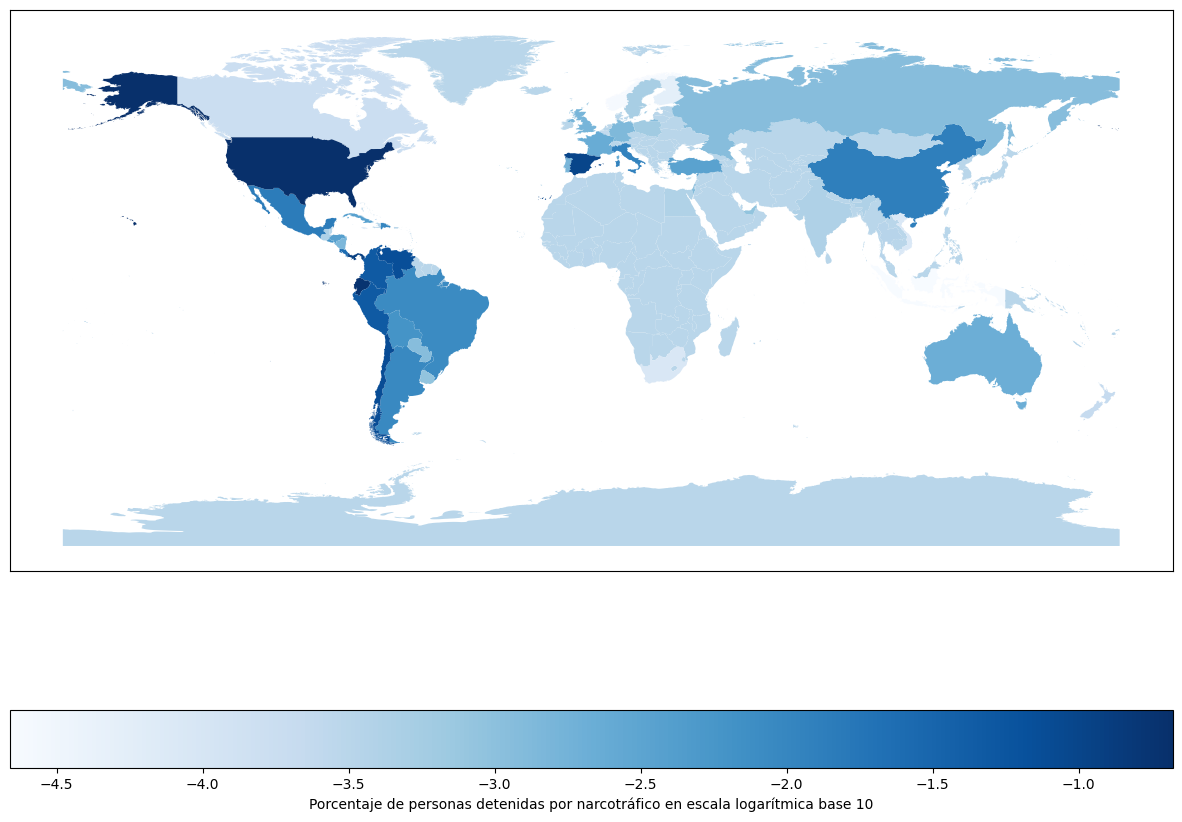

In [ ]:
plt.rcParams["figure.figsize"] = (15, 12)

shapefile_2.plot(column = 'CANTIDAD',  legend = True,
            legend_kwds = {
              'label': "Porcentaje de personas detenidas por narcotráfico en escala logarítmica base 10",
              'orientation': "horizontal",
              },
            cmap = 'Blues');

frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])

**===5.2 Relación monocromatica del género en detención con respectos a los paises===**

In [ ]:
df_colombianos_presos['GÉNERO'].unique()

array(['MASCULINO', 'FEMENINO', 'OTRO', 'NO_BINARIO'], dtype=object)

In [ ]:
mask_genero = df_colombianos_presos["GÉNERO"]=='MASCULINO'

df_genero = df_colombianos_presos[mask_genero]

df_genero = df_genero[['PAIS PRISIÓN', 'GÉNERO', 'CANTIDAD']]
df_genero

,PAIS PRISIÓN,GÉNERO,CANTIDAD
0,ECUADOR,MASCULINO,45
1,ITALIA,MASCULINO,1
2,ESTADOS UNIDOS,MASCULINO,1
3,MÉXICO,MASCULINO,7
5,ITALIA,MASCULINO,1
...,...,...,...
339817,CHILE,MASCULINO,2
339818,COSTA RICA,MASCULINO,13
339819,ESTADOS UNIDOS,MASCULINO,2
339820,COLOMBIA,MASCULINO,1


In [ ]:
select = ['PAIS PRISIÓN', 'CANTIDAD']

groups = ['PAIS PRISIÓN']

df_genero_sum = df_genero[select].groupby(by = groups).sum()

df_genero_sum.reset_index(inplace=True)

total = df_genero_sum['CANTIDAD'].sum()

R = df_genero_sum.shape[0]

for i in range (0, R):

  df_genero_sum.iloc[i,1] = df_genero_sum.iloc[i,1]/total

df_genero_sum.iloc[-1, 0] = 'VIETNAM'

for i in range (0, R):

  df_genero_sum.iloc[i,1] = log(df_genero_sum.iloc[i,1], 10)

df_genero_sum.head(10)

<ipython-input-234-52b7c70a0859>:15: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0020534038714942267' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



,PAIS PRISIÓN,CANTIDAD
0,ALEMANIA,-2.687526
1,ARGENTINA,-1.603568
2,ARUBA,-2.802194
3,AUSTRALIA,-2.776057
4,AUSTRIA,-3.443076
5,BOLIVIA,-2.138775
6,BRASIL,-1.993938
7,BÉLGICA,-3.058815
8,CANADÁ,-2.745454
9,CHILE,-1.231084


In [ ]:
shapefile_2 = shapefile.merge(right = df_genero_sum,
                     left_on = 'PAÍS',
                     right_on = 'PAIS PRISIÓN',
                     how = 'left')



for i in range (0, 252):


  if  shapefile_2.iloc[i, 2] == 'NaN':
    shapefile_2.iloc[i, 2] = shapefile_2.iloc[i, 0]


  if  math.isnan(shapefile_2.iloc[i, 3]):
    shapefile_2.iloc[i, 3] = -4.5

shapefile_2

,PAÍS,geometry,PAIS PRISIÓN,CANTIDAD
0,ARUBA (PAISES BAJOS),"POLYGON ((-69.88223 12.41111, -69.94695 12.436...",NaN,-4.500000
1,ANTIGUA Y BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",NaN,-4.500000
2,AFGANISTÁN,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",NaN,-4.500000
3,ARGELIA,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236...",NaN,-4.500000
4,AZERBAIYÁN,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...",NaN,-4.500000
...,...,...,...,...
247,SUDÁN DEL SUR,"POLYGON ((34.21807 9.96458, 34.20722 9.905, 34...",NaN,-4.500000
248,INDONESIA,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832...",INDONESIA,-3.750891
249,TIMOR ORIENTAL,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -...",NaN,-4.500000
250,CURAZAO (PAISES BAJOS),"POLYGON ((-68.96556 12.19889, -68.91196 12.181...",NaN,-4.500000


[]

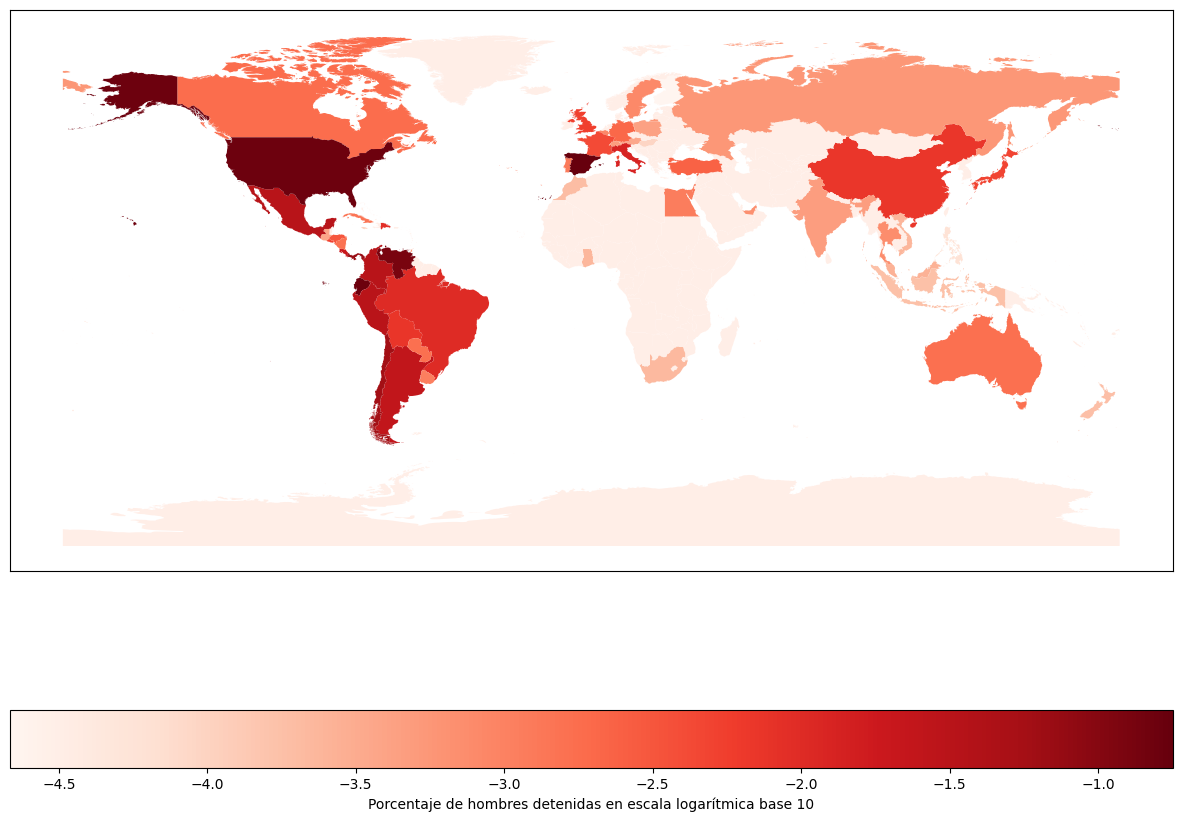

In [ ]:
plt.rcParams["figure.figsize"] = (15, 12)

shapefile_2.plot(column = 'CANTIDAD',  legend = True,
            legend_kwds = {
              'label': "Porcentaje de hombres detenidas en escala logarítmica base 10",
              'orientation': "horizontal",
              },
            cmap = 'Reds');

frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])

# **9. Mapa interactivo**

In [ ]:
Mapa = folium.Map(location=[26.3351,	17.228331] , zoom_start=3 ,tiles="https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryTopo/MapServer/tile/{z}/{y}/{x}",
                  attr='Tiles courtesy of the <a href="https://usgs.gov/">U.S. Geological Survey</a>' )

for each in df_cant_colombianos_detenidos_por_pais.iterrows():

  lat = each[1]['LATITUD']
  longi = each[1]['LONGITUD']
  Cantidad = each[1]['CANTIDAD']

  popup_text = """País: {}<br>
                  Cantidad de detenidos : {}<br>"""

  popup_text = popup_text.format(each[1]['PAÍS'], each[1]['CANTIDAD'])

  pp = folium.Popup(popup_text, max_width=500)

  #RANGO DE COLORES PARA MARCADORES SEGÚN CANTIDAD
  if Cantidad >= 60000 :
                icon = folium.Icon(color="red")
  elif Cantidad >= 10000 :
                icon = folium.Icon(color="orange")
  elif Cantidad >= 1000 :
                icon = folium.Icon(color="blue")
  else:
                icon = folium.Icon(color="green")

  Marker = folium.Marker(location = [lat,longi],
                popup = pp,
                icon = icon,
                ).add_to(Mapa)

from branca.element import Template, MacroElement

#LEYENDA HTML
template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>

  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>


<div id='maplegend' class='maplegend'
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:18px; right: 20px; bottom: 20px;'>

<div class='legend-title'>CANTIDAD DE DETENCIONES</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>Mayor o igual que 60.000 detenciones</li>
    <li><span style='background:orange;opacity:0.7;'></span>Mayor o igual que 10.000 y menor que 60.000 detenciones</li>
    <li><span style='background:#2AB4C7 ;opacity:0.7;'></span>Mayor o igual que 1.000 y menor que 10.000 detenciones</li>
    <li><span style='background:#2FA72C;opacity:0.7;'></span>Menos de 1.000 detenciones</li>

  </ul>
</div>
</div>

</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 100%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 90%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

Mapa.get_root().add_child(macro)

# https://nbviewer.jupyter.org/gist/talbertc-usgs/18f8901fc98f109f2b71156cf3ac81cd, Autor Código de leyenda: Colin Talbert
Mapa

# **10. Guardar Archivo Limpio**

In [ ]:
nombre_archivo_csv = 'col_det_clean.csv'

df_colombianos_presos.to_csv(nombre_archivo_csv, index=False, encoding='utf-8', sep=',')

print(f"DataFrame guardado como '{nombre_archivo_csv}'")

¡DataFrame guardado exitosamente como 'col_det_clean.csv'!
